In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix , classification_report 
from sklearn.metrics import roc_curve,auc

In [4]:
# Load the data
data = pd.read_csv("/Users/zahiramohammed/Desktop/DAPM_clean.csv")
data.head(1)

,Gender,Age,Hyper_Tension,Heart_Disease,Smoking_History,BMI,Blood_Glucose_Level,HbA1c_levels,Diabetes
0,1,1,0,0,0,-0.686567,0,2,0


/Users/zahiramohammed/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


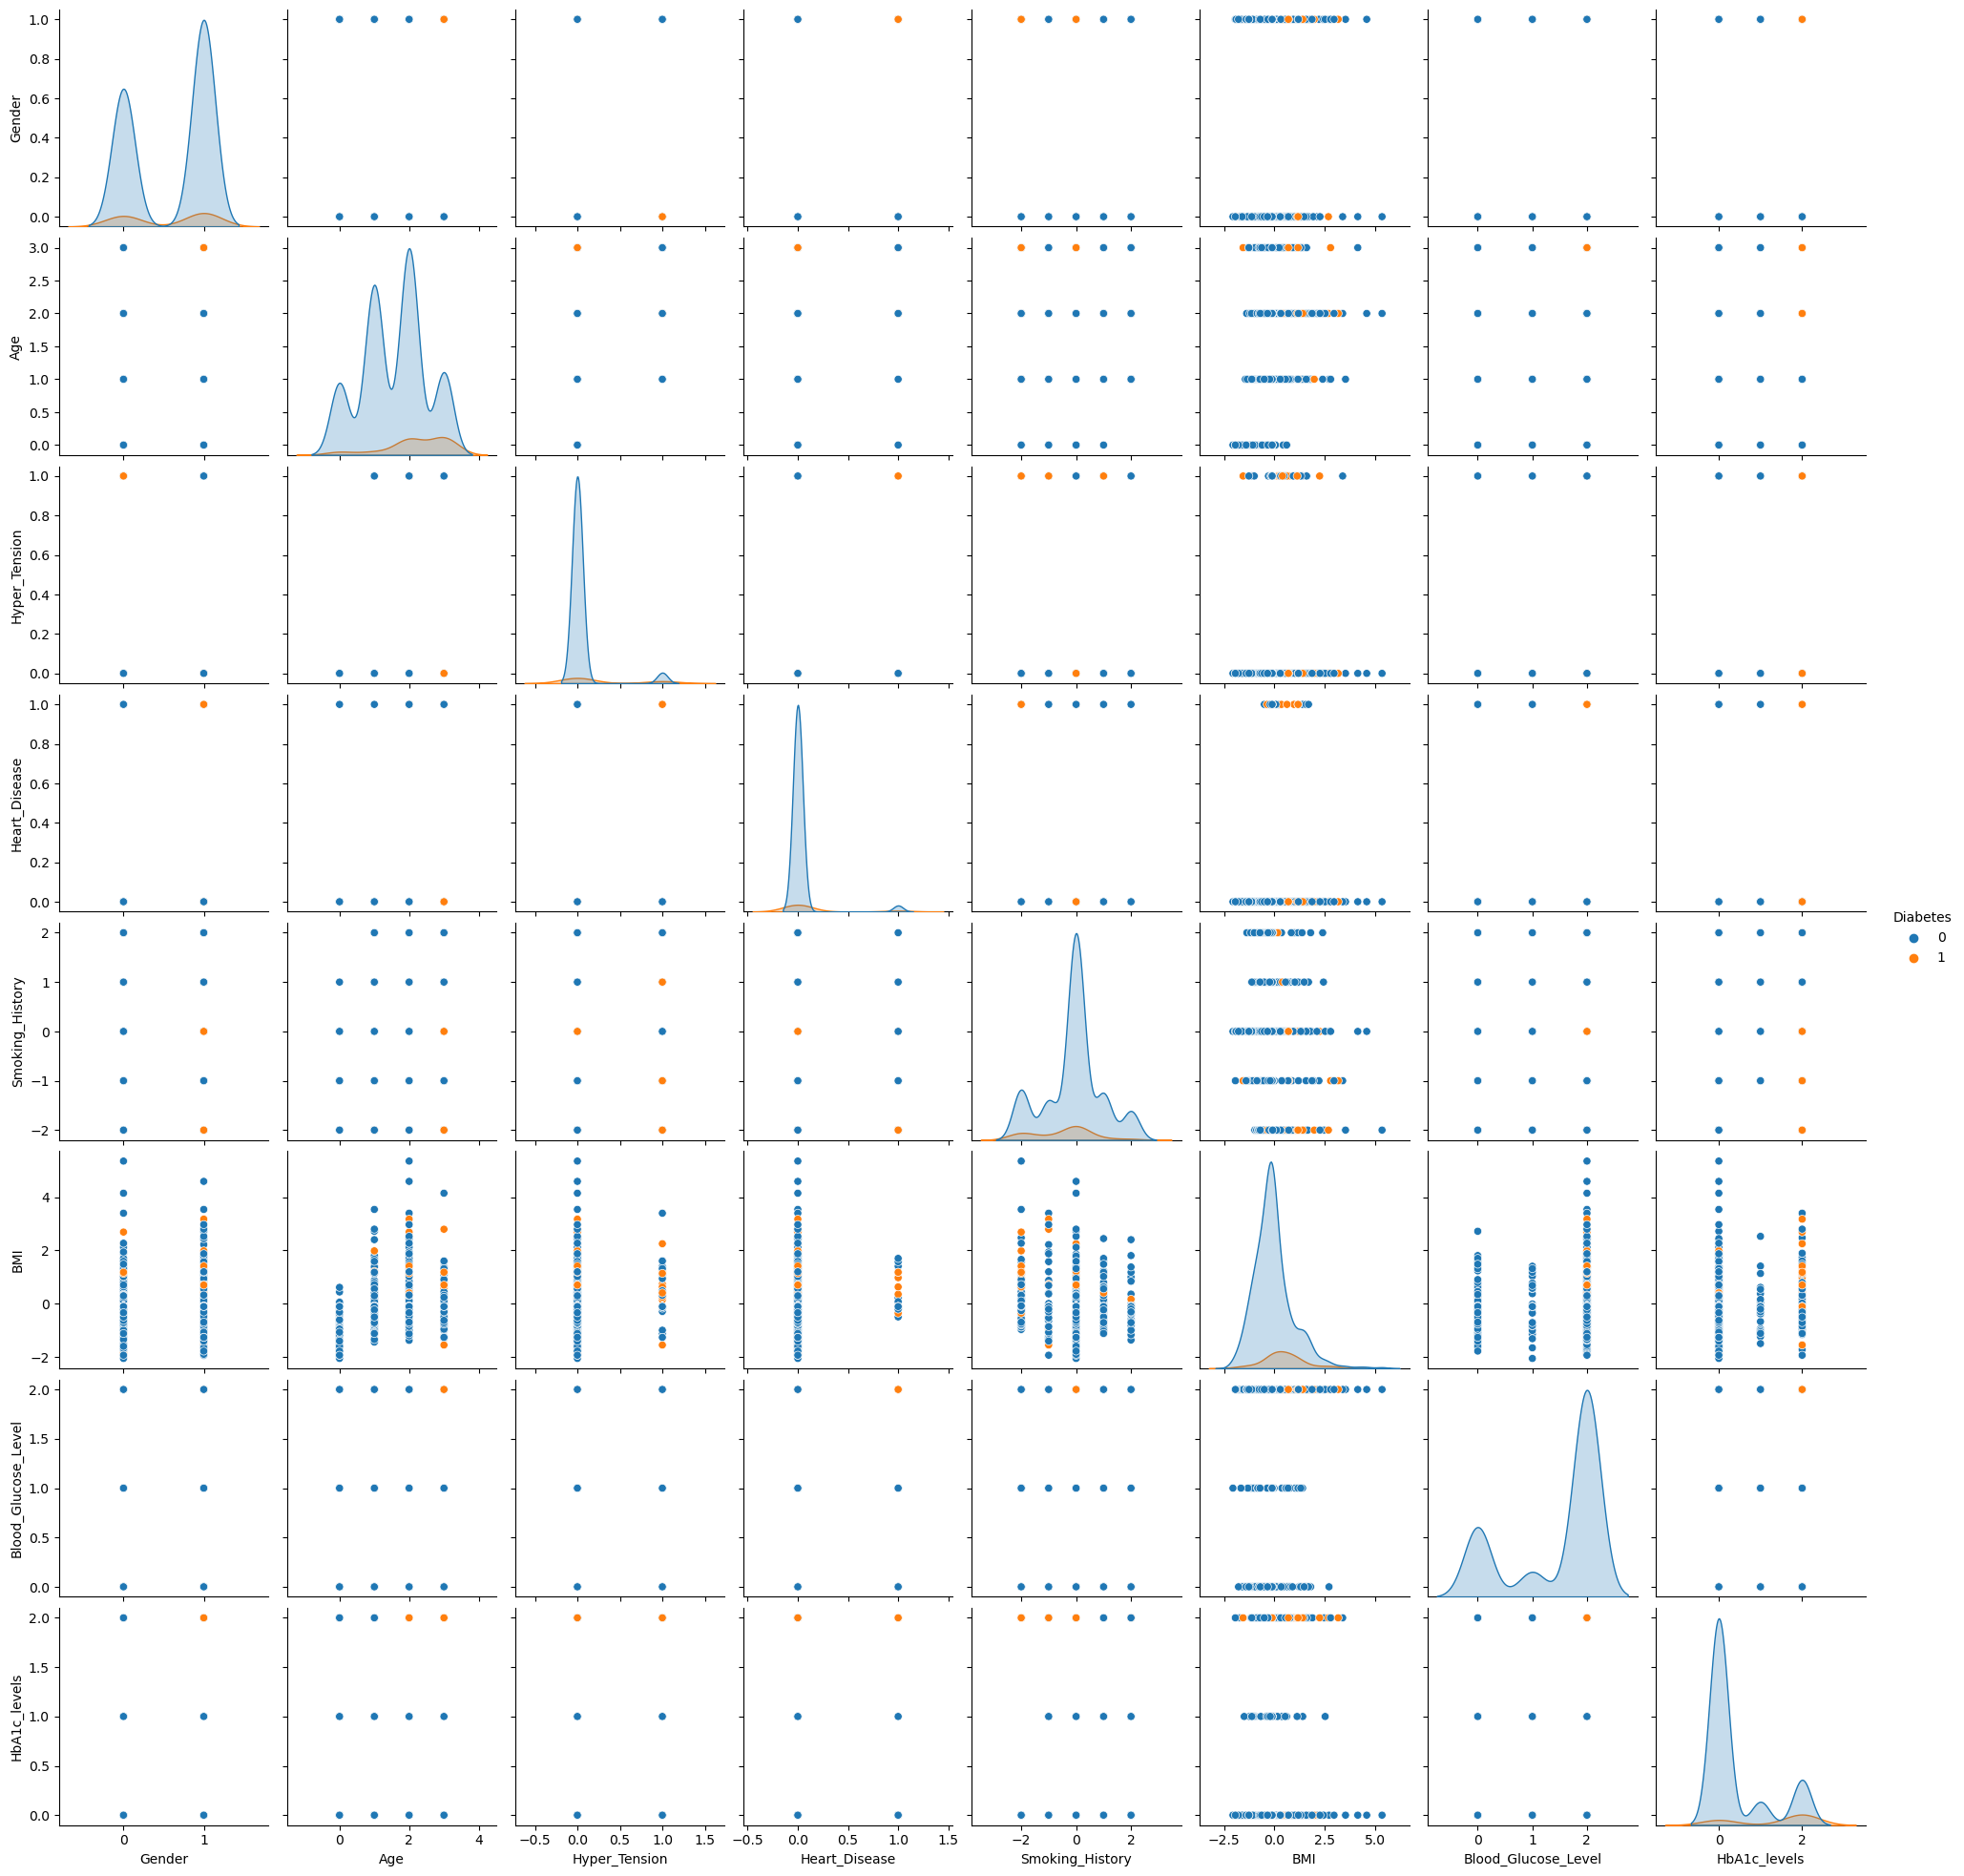

In [5]:
# Data inspection
sns.pairplot(data, hue='Diabetes')
plt.show()


In [6]:
# Feature and target variables
X = data.drop('Diabetes', axis=1)
y = data['Diabetes']

In [10]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Naive Bayes Classifier

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Accuracy: 34.8

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.28      0.44       226
           1       0.13      1.00      0.23        24

    accuracy                           0.35       250
   macro avg       0.56      0.64      0.33       250
weighted avg       0.92      0.35      0.42       250



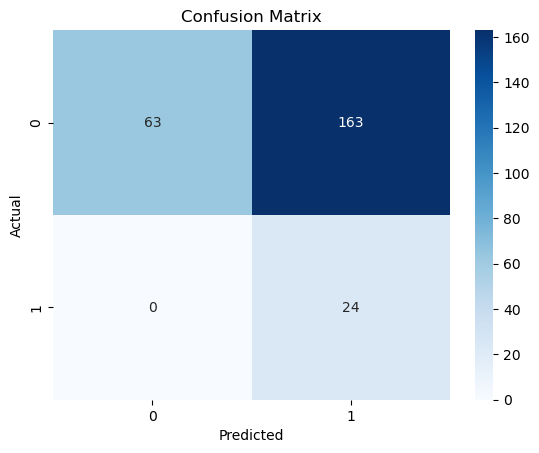

In [11]:
# Predictions
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Predicting the class label of a new observation
#new_observation = [52, 65, 1, 0]
#predicted_class = gnb.predict([new_observation])
#predicted_prob = gnb.predict_proba([new_observation])
#print(f"Predicted Class: {predicted_class[0]}")
#print(f"Predicted Probabilities: Yes={predicted_prob[0][1]}, No={predicted_prob[0][0]}")

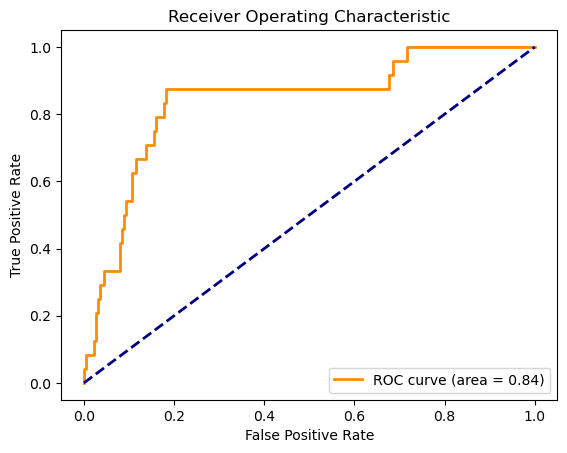

In [13]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()